In [1]:
import numpy as np
import pandas as pd
from astropy.io import ascii
from astropy.coordinates import SkyCoord
from astropy import units as u
import os
import matplotlib.pyplot as plt

In [2]:
pop1 = pd.read_csv('Catalogues/NGC2539_GMM_Population1.csv')
pop1

,RA_ICRS,DE_ICRS,Source,e_RA_ICRS,e_DE_ICRS,Plx,e_Plx,PM,pmRA,e_pmRA,...,RUWE,Gmag,BPmag,RPmag,BP-RP,RV,ELAT,RAJ2000,DEJ2000,Plx_corr
0,122.480864,-13.408580,5725195086362592896,0.0091,0.0076,0.7372,0.0136,2.353,-2.286,0.013,...,0.988,13.472965,13.666136,13.149684,0.516452,NaN,-32.626777,122.480874,-13.408578,0.779411
1,122.414196,-13.314850,5725199621848057984,0.0086,0.0071,0.7725,0.0128,2.388,-2.311,0.012,...,0.930,13.363639,13.594479,12.984633,0.609845,38.47,-32.552534,122.414207,-13.314847,0.814383
2,122.250761,-13.170479,5725956017127403648,0.0172,0.0129,0.7394,0.0263,2.385,-2.347,0.027,...,1.056,14.926690,15.240170,14.442820,0.797351,NaN,-32.452962,122.250772,-13.170477,0.781669
3,122.103406,-13.064577,5725970276418851328,0.0126,0.0091,0.7605,0.0178,2.361,-2.301,0.019,...,0.998,13.934523,14.170032,13.552169,0.617864,24.37,-32.386462,122.103416,-13.064574,0.802698
4,122.736248,-13.477531,5726679633214860928,0.0129,0.0106,0.7834,0.0185,2.562,-2.527,0.019,...,1.116,14.186480,14.451936,13.763537,0.688398,25.56,-32.630235,122.736259,-13.477529,0.825525
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
437,121.975287,-12.883127,5727523680190197376,0.0394,0.0310,0.8031,0.0630,2.433,-2.383,0.058,...,0.974,16.809248,17.456442,15.993611,1.462830,NaN,-32.241933,121.975298,-12.883124,0.833813
438,121.936621,-12.707378,5727531204972856960,0.0419,0.0298,0.7627,0.0658,2.500,-2.442,0.064,...,1.057,16.861015,17.404684,16.179090,1.225594,NaN,-32.081083,121.936632,-12.707376,0.793513
439,121.995876,-12.618445,5727549621792548352,0.0227,0.0166,0.7953,0.0353,2.304,-2.222,0.033,...,1.025,15.751667,16.133024,15.208096,0.924929,NaN,-31.980576,121.995886,-12.618442,0.837820
440,121.986920,-12.414453,5727556699898070144,0.0189,0.0135,0.7293,0.0276,2.347,-2.289,0.027,...,1.037,15.343348,15.686052,14.838098,0.847955,NaN,-31.785136,121.986930,-12.414451,0.771788


In [3]:
pop2 = pd.read_csv('Catalogues/NGC2539_GMM_Population2.csv')
pop2

,RA_ICRS,DE_ICRS,Source,e_RA_ICRS,e_DE_ICRS,Plx,e_Plx,PM,pmRA,e_pmRA,...,RUWE,Gmag,BPmag,RPmag,BP-RP,RV,ELAT,RAJ2000,DEJ2000,Plx_corr
0,122.480864,-13.408580,5725195086362592896,0.0091,0.0076,0.7372,0.0136,2.353,-2.286,0.013,...,0.988,13.472965,13.666136,13.149684,0.516452,NaN,-32.626777,122.480874,-13.408578,0.779411
1,122.414196,-13.314850,5725199621848057984,0.0086,0.0071,0.7725,0.0128,2.388,-2.311,0.012,...,0.930,13.363639,13.594479,12.984633,0.609845,38.47,-32.552534,122.414207,-13.314847,0.814383
2,122.250761,-13.170479,5725956017127403648,0.0172,0.0129,0.7394,0.0263,2.385,-2.347,0.027,...,1.056,14.926690,15.240170,14.442820,0.797351,NaN,-32.452962,122.250772,-13.170477,0.781669
3,122.103406,-13.064577,5725970276418851328,0.0126,0.0091,0.7605,0.0178,2.361,-2.301,0.019,...,0.998,13.934523,14.170032,13.552169,0.617864,24.37,-32.386462,122.103416,-13.064574,0.802698
4,122.775145,-13.479979,5726679491477381504,0.0099,0.0081,0.6943,0.0144,2.384,-2.350,0.014,...,1.056,13.190701,13.337885,12.910949,0.426936,NaN,-32.622936,122.775155,-13.479977,0.736667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
544,121.986992,-12.075530,5727777839175515520,0.0126,0.0085,0.7857,0.0186,2.512,-2.378,0.019,...,0.937,14.231053,14.491918,13.813985,0.677933,32.14,-31.456736,121.987003,-12.075527,0.828046
545,122.125904,-12.096970,5727779797680542464,0.0141,0.0096,0.7248,0.0215,2.197,-2.163,0.022,...,0.989,14.497416,14.759340,14.081089,0.678251,34.35,-31.443894,122.125913,-12.096969,0.767314
546,122.084503,-11.893047,5727798523739919360,0.0471,0.0336,0.7568,0.0697,2.383,-2.357,0.069,...,1.000,17.198061,17.843935,16.455805,1.388130,NaN,-31.256342,122.084513,-11.893045,0.785921
547,122.369838,-11.763095,5727883426649794560,0.0098,0.0077,0.7174,0.0149,2.419,-2.345,0.015,...,0.983,13.256223,13.424639,12.966224,0.458415,NaN,-31.061217,122.369849,-11.763092,0.759958


## Plotting their CMDS

Text(0.5, 0, 'BP - RP (mag)')

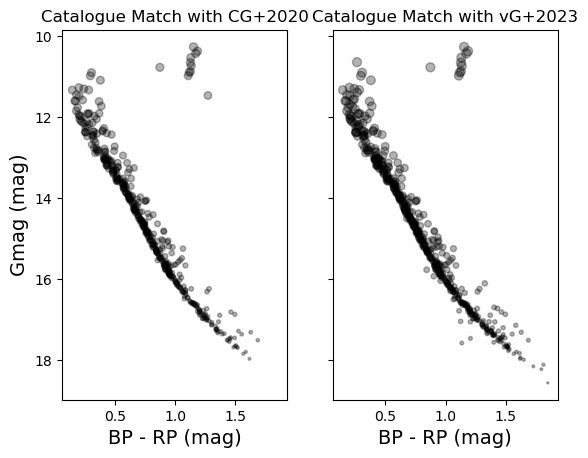

In [9]:
fig,ax = plt.subplots(1,2,sharex=True,sharey=True)

ax[0].set_title('Catalogue Match with CG+2020')
ax[0].scatter(pop1['BP-RP'],pop1.Gmag, s=(19-pop1.Gmag)*4,c='k', alpha=0.3)
ax[0].set_xlabel('BP - RP (mag)',fontsize=14)
ax[0].set_ylabel('Gmag (mag)',fontsize=14)
ax[0].invert_yaxis()

ax[1].set_title('Catalogue Match with vG+2023')
ax[1].scatter(pop2['BP-RP'],pop2.Gmag, s=(19-pop2.Gmag)*5, c='k', alpha=0.3)
ax[1].set_xlabel('BP - RP (mag)',fontsize=14)

### Adjusting the isochrones

In [11]:
#reading the table of isochrones
iso = ascii.read("Catalogues/isochrones.csv")

In [206]:
kk, = np.where(iso["logAge"] == 8.75001)  #binaries
jj, = np.where(iso["logAge"] == 8.80001)
ll, = np.where(iso["logAge"] == 8.85001)  #turn

iso_sel1 = iso[kk]
iso_sel2 = iso[jj]
iso_sel3 = iso[ll]

In [207]:
EBV = 0.08
AV = 3.1 * EBV

# Modulo da distancia em Mpc tirado de CG+2020
Md = 10.6

DY = Md + 0.8363*AV
DX = (1.083-0.634)*AV

Text(0.5, 0, '$G_{BP}-G_{RP}$ (mag)')

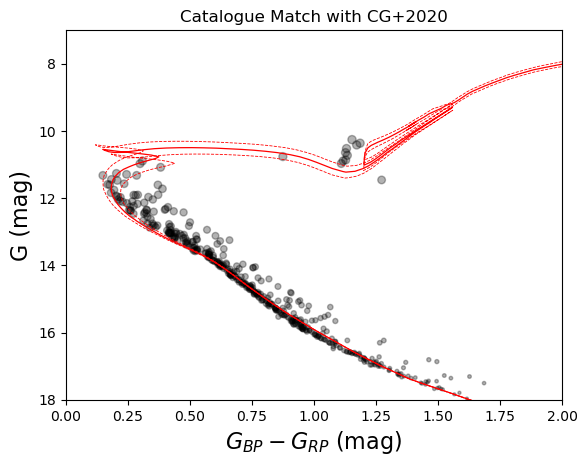

In [212]:
fig, ax = plt.subplots()
ax.set_title("Catalogue Match with CG+2020")
ax.scatter(pop1['BP-RP'],pop1.Gmag, s=(19-pop1.Gmag)*4,c='k', alpha=0.3)
ax.plot((iso_sel1['G_BPmag']-iso_sel1['G_RPmag']) + DX, iso_sel1["Gmag"] + DY, color='r',linestyle='--',linewidth=0.6)
ax.plot((iso_sel2['G_BPmag']-iso_sel2['G_RPmag']) + DX, iso_sel2["Gmag"] + DY, color='r',linewidth=0.9)
ax.plot((iso_sel3['G_BPmag']-iso_sel3['G_RPmag']) + DX, iso_sel3["Gmag"] + DY, color='r',linestyle='--',linewidth=0.6)

ax.set_xlim(0, 2.0)
ax.set_ylim(18, 7)
ax.set_ylabel(r"G (mag)",fontsize=16)
ax.set_xlabel(r"$G_{BP}-G_{RP}$ (mag)",fontsize=16)

Text(0.5, 0, '$G_{BP}-G_{RP}$ (mag)')

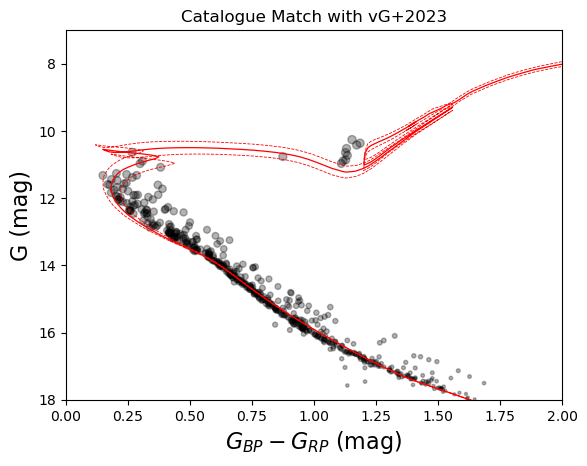

In [213]:
fig, ax = plt.subplots()
ax.set_title("Catalogue Match with vG+2023")
ax.scatter(pop2['BP-RP'],pop2.Gmag, s=(19-pop2.Gmag)*4,c='k', alpha=0.3)
ax.plot((iso_sel1['G_BPmag']-iso_sel1['G_RPmag']) + DX, iso_sel1["Gmag"] + DY, color='r',linestyle='--',linewidth=0.6)
ax.plot((iso_sel2['G_BPmag']-iso_sel2['G_RPmag']) + DX, iso_sel2["Gmag"] + DY, color='r',linewidth=0.9)
ax.plot((iso_sel3['G_BPmag']-iso_sel3['G_RPmag']) + DX, iso_sel3["Gmag"] + DY, color='r',linestyle='--',linewidth=0.6)

ax.set_xlim(0, 2.0)
ax.set_ylim(18, 7)
ax.set_ylabel(r"G (mag)",fontsize=16)
ax.set_xlabel(r"$G_{BP}-G_{RP}$ (mag)",fontsize=16)